In [1]:
from maelzel.core import *

In [2]:
w = getWorkspace()

In [3]:
w.reverbInfo()

{'gaindb': -6, 'delayms': 60, 'decay': 3, 'damp': 0.2, 'active': False}

In [4]:
instr = defSoundfont("/home/em/Lib/snd/sf2/MSCrotales2.sf2", reverb=True)
instr

Preset: Crotales  
    routing=False, properties={'sfpath': '/home/em/Lib/snd/sf2/MSCrotales2.sf2', 'ampDivisor': 0, 'reverbInstr': '.zitarev'}
  init: i__SfTable__ sfloadonce "/home/em/Lib/snd/sf2/MSCrotales2.sf2"
  |ktransp=0.0, ipitchlag=0.1, ivel=-1, kwet=0.0|
  ipresetidx sfpresetindex "/home/em/Lib/snd/sf2/MSCrotales2.sf2", 0, 9
  iamp0_ = p(idataidx_ + 2)
  inote0_ = round(p(idataidx_ + 1))
  kpitch2 = lag:k(kpitch + ktransp, ipitchlag)
  iampdiv_ = 16384
  if ivel < 0 then
      ivel _linexp dbamp(iamp0_), 2.6, -72, 0, 1, 127
  endif
  aout1, aout2 sfplay ivel, inote0_, kamp/iampdiv_, mtof:k(kpitch2), ipresetidx, 1
  kpos = kpos == -1 ? 0.5 : kpos
  a_outL, a_outR = panstereo(aout1, aout2, kpos)
  if kwet > 0 then
      chnmix a_outL * kwet, ".zitarev.1"
      chnmix a_outR * kwet, ".zitarev.2"
      kdry = 1 - kwet
      a_outL *= kdry
      a_outR *= kdry
  endif
  outch ichan, a_outL, ichan + 1, a_outR
  epilogue:
    turnoffWhenSilent aout1

In [5]:
w.setReverb(decay=3, init=True)

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:
Exception in thread Thread-5 (_dispatcher):
Traceback (most recent call last):
  File "/home/em/.local/share/uv/python/cpython-3.13.3-linux-x86_64-gnu/lib/python3.13/threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "/home/em/.local/share/uv/python/cpython-3.13.3-linux-x86_64-gnu/lib/python3.13/threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/em/.virtualenvs/maelzel/lib/python3.13/site-p

In [6]:
ch = Chain([Note(m, dur=1) for m in range(90, 108)])
ch.play(instr=instr.name, kwet=0.7, sustain=20)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=18)
    Synth(‖ preset:Crotales=401.0002 start=.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=90 p21=0.515178 p22=1 p23=90 …)
    Synth(‖ preset:Crotales=401.0003 start=1.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=91 p21=0.515178 p22=1 p23=91 …)
    Synth(‖ preset:Crotales=401.0004 start=2.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=92 p21=0.515178 p22=1 p23=92 …)
    Synth(‖ preset:Crotales=401.0005 start=3.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=93 p21=0.515178 p22=1 p23=93 …)
    Synth(‖ preset:Crotales=401.0006 start=4.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=94 p21=0.515178 p22=1 p23=94 …)
    Synth(‖ preset:Crotales=401.0007 start=5.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=95 p21=0.515178 p22=1 p23=95 …)
    Synth(‖ preset:Crotales=401.0008 start=6.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=96 p21=0.515178 p22=1 p23=96 …)
    Synth(‖ preset:Crotales=401.0009 start=7.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=97 p21=0.515178 p22=1 p23=97 …)
    Synth(‖ preset:Crotales=401.001 start=8.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=98 p21=0.515178 p22=1 p23=98 …)
    Synth(‖ preset:Crotales=401.0011 start=9.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=99 p21=0.515178 p22=1 p23=99 …)
    Synth(‖ preset:Crotales=401.0012 start=10.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=100 p21=0.515178 p22=1 p23=100 …)
    Synth(‖ preset:Crotales=401.0013 start=11.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=101 p21=0.515178 p22=1 p23=101 …)
    Synth(‖ preset:Crotales=401.0014 start=12.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=102 p21=0.515178 p22=1 p23=102 …)
    Synth(‖ preset:Crotales=401.0015 start=13.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=103 p21=0.515178 p22=1 p23=103 …)
    Synth(‖ preset:Crotales=401.0016 start=14.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=104 p21=0.515178 p22=1 p23=104 …)
    Synth(‖ preset:Crotales=401.0017 start=15.878 dur=21 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0.7 p19=0 p20=105 p21=0.515178 p22=1 p23=105 …)

In [7]:
w.setReverb(decay=30, gaindb=0)

In [8]:
w.reverbInfo()

{'decay': 30,
 'gaindb': 0,
 'delayms': 60,
 'damp': 0.2,
 'synth': Synth(▶ .zitarev=2289.0002 start=.137 dur=-1 kchan=1 kwet=1 kgaindb=-6 kdelayms=60 khfdamp=6000 kdecay=3 kdamp=0.2),
 'active': True}

In [9]:
rev = w.reverbSynth()
rev.stop()


In [10]:
rev.ui()


Button(description='Stop', style=ButtonStyle())

FloatSlider(value=-6.0, description='kgaindb', layout=Layout(width='80%'), max=18.0, min=-90.0, readout_format…

FloatSlider(value=60.0, description='kdelayms', layout=Layout(width='80%'), max=400.0, readout_format='d', ste…

FloatSlider(value=3.0, description='kdecay', layout=Layout(width='80%'), max=60.0, min=0.01, readout_format='.…

FloatSlider(value=6000.0, description='khfdamp', layout=Layout(width='80%'), max=22000.0, min=50.0, readout_fo…

FloatSlider(value=0.2, description='kdamp', layout=Layout(width='80%'), max=0.999, min=0.001, readout_format='…

FloatSlider(value=1.0, description='kchan', layout=Layout(width='80%'), max=64.0, min=1.0, readout_format='.1f…

FloatSlider(value=1.0, description='kwet', layout=Layout(width='80%'), max=1.0, readout_format='.3f', step=0.0…

In [12]:
rev.playStatus()

'stopped'

time range: scorestart=0.0, renderend=40.0, endtime=18.0


OfflineRenderer(sr=44100)
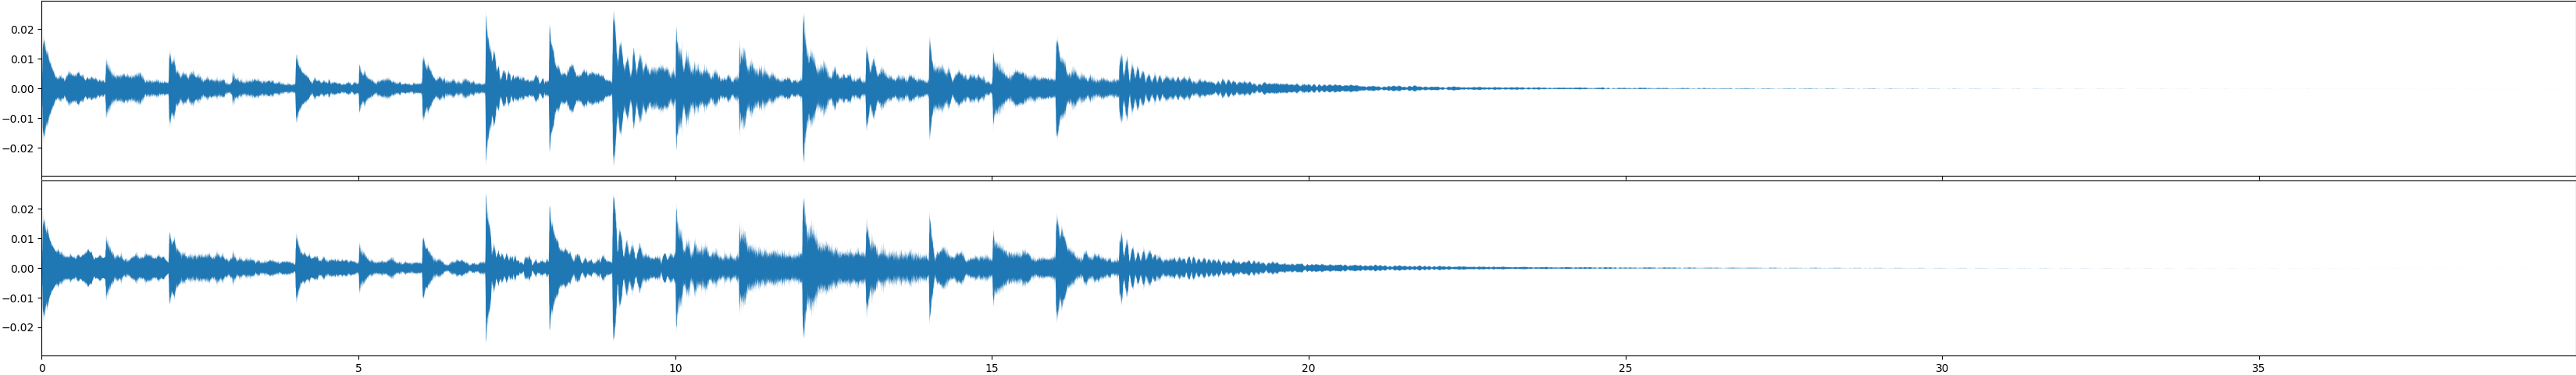

In [10]:
ch.rec(extratime=10, instr=instr.name, kwet=0.9, sustain=12)

In [11]:
r = w.reverbSynth()
if r:
    r.ui()

Button(description='Stop', style=ButtonStyle())

FloatSlider(value=-6.0, description='kgaindb', layout=Layout(width='80%'), max=6.0, min=-120.0, readout_format…

FloatSlider(value=60.0, description='kdelayms', layout=Layout(width='80%'), max=400.0, readout_format='d', ste…

FloatSlider(value=6000.0, description='khfdamp', layout=Layout(width='80%'), max=22000.0, min=50.0, readout_fo…

FloatSlider(value=0.2, description='kdamp', layout=Layout(width='80%'), max=0.999, min=0.001, readout_format='…

FloatSlider(value=1.0, description='kchan', layout=Layout(width='80%'), max=64.0, min=1.0, readout_format='.1f…

FloatSlider(value=1.0, description='kwet', layout=Layout(width='80%'), max=1.0, readout_format='.3f', step=0.0…

FloatSlider(value=30.0, description='kdecay', layout=Layout(width='80%'), max=500.0, readout_format='d', step=…

In [9]:
r.set(khfdamp=6000, kdecaymid=18, kgaindb=-3)

In [30]:
rev.set(kgaindb=-3, kdelayms=60, kdecaylow=4, kdecaymid=3, kwet=1)

In [1]:
from maelzel.core import *
s = Workspace.active.audioSession()
s

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Session(maelzel.core, backend=jack, outdev=Built-in Audio Analog Stereo, synths=0)